<a href="https://colab.research.google.com/github/nistaku/TMDL/blob/main/TMDL_2024_25_Assignment_1%2C_Qs_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Turing Machine and Deep Learning

## Assignment 1: Preliminaries

This notebook is meant for you to review some mathematics to help your intuition when dealing with more complex models, and some hands on practice with `numpy` and `matplotlib` to review some programming skills. It also introduces you to some common ML lingo. This notebook must be in your GitHub directory by the deadline mentioned on Canvas.

### Handing in your Assignment

Git is an invaluable resource to researchers and developers, and thus for this course, all course material will be (additionally) shared on GitHub. Though there is a tiny bit of a learning curve, this is worth the effort. To hand in your assignment (applicable to all weeks):

1. Create a GitHub repository (this will be where you submit *all* homework assignments). Share the public link to this repository with us via
2. Create a folder called "Week 1" and copy this notebook and any other files or data that may be needed.
3. Finish the notebook and commit and push regularly. Your final commit before the deadline will be graded.


### Grading

Grading is based on effort and you can either obtain a pass or fail for the assignment.

## Question 1.1 -- Regression as minimization

Derive the closed form solution for ***a*** in a 1-dimensional linear regression as states as an optimization (minimization) problem. You may upload a handwritten scan/photograph, a screenshot of a text editor, or LaTeX notation directly.

- *Given*: $n$ input-output pairs of the form $$(x_i, y_i)$$
- *To find*: The coefficients of the line of best fit $$\hat{y_i} = a+bx_i$$
- *Loss function*: The sum of squared errors: $$f(Y, \hat{Y})=\sum_{i=0}^{n}(y_i-\hat{y}_i)^2$$
- ***b*** is found by taking partial derivates with respect to ***b*** and setting it to zero. This gives $$ b = \frac{\sum_{i=0}^{n}(x_i - \bar{x})(y_i-\bar{y})}{\sum_{i=0}^{n}(x_i - \bar{x})^2} $$
Note that in general, loss functions are the distance function *averaged over all data points in the set*. For now, you can ignore this point.

*Hint: Treat this as a regular minimization problem. Find where the partial derivates are zero of the error are with respect to the variables you wish to find.*

### **Derivation of the Intercept $a$**
To find the optimal $ a $, differentiate the loss function:

$$
f(a, b) = \sum_{i=0}^{n} (y_i - (a + b x_i))^2.
$$

Taking the partial derivative with respect to $ a $:

$$
\frac{\partial f}{\partial a} = \sum_{i=0}^{n} 2 (y_i - (a + b x_i)) (-1) = -2 \sum_{i=0}^{n} (y_i - a - b x_i).
$$

Setting this equal to zero:

$$
\sum_{i=0}^{n} (y_i - a - b x_i) = 0.
$$

Rearranging:

$$
\sum_{i=0}^{n} y_i - \sum_{i=0}^{n} a - b \sum_{i=0}^{n} x_i = 0.
$$

Since $ a $ is constant, summing over $ n $ terms gives $ n a $:

$$
\sum_{i=0}^{n} y_i - n a - b \sum_{i=0}^{n} x_i = 0.
$$

Dividing by $ n $:

$$
\bar{y} - a - b \bar{x} = 0.
$$

Solving for $ a $:

$$
a = \bar{y} - b \bar{x}.
$$

### **Conclusion**
The closed-form solution for the intercept $ a $ is:

$$
a = \bar{y} - b \bar{x}.
$$

## Question 1.2 -- Function analysis

Is there only one unique solution for $a$ and $b$? Why/why not?

*Hint: Think of the shape of the loss function, a.k.a. the 'loss landscape'.*

If $x_i$ values vary, the loss function is strictly convex, meaning it has one unique minimum where a and b are uniquely determined.
If all $x_i$ values are the same, the problem is ill-posed, and b cannot be uniquely determined.

Would the solutions for $a$ and $b$ be different if you used mean squared error instead of sum of squared errors? Why?

The choice between SSE and MSE only affects the scale of the loss, not the optimal parameter values. Therefore, using MSE instead of SSE results in the same a and b.

## Question 2.1 -- Function generation

Write a function that takes as input a list of floats $x_i$ to and outputs a list of the form:
$$y_i=sin(x_i)+\eta_i$$
where $\eta_i$ is normally sampled noise with a small standard deviation $\epsilon$:
$$\eta_i \sim \mathcal{N}(0, \epsilon)$$

Now, to see your work, plot it!
- Sample 20 equally-spaced points from the range $x\in [0,\pi/4]$ (cf. numpy's `linspace` function).
- Set $\epsilon=0.1$
- Sample y-values from your function using the noisy formula above.
- Plot this as a scatter plot.
- For reference, plot the function $y_i=sin(x_i)$ (no noise).
- Don't forget to add labels, a legend and other information.
- Optional Tip: Set a random seed (np.random.seed) to ensure reproducability of your results.

---


Your results should look something like this:

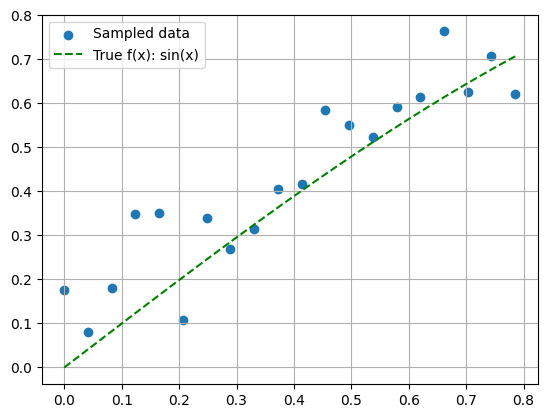

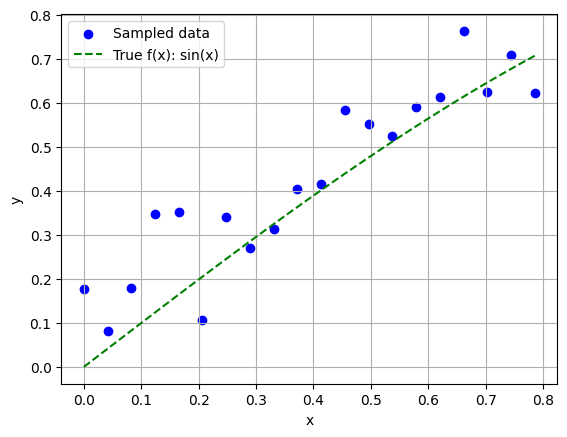

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(0)

# Function to generate noisy sine data
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, size=len(x))  # Sample noise from N(0, epsilon)
    return np.sin(x) + noise

# Parameters
n_samples = 20
epsilon = 0.1
x_min, x_max = 0, np.pi / 4

# Generate x values
x = np.linspace(x_min, x_max, n_samples)

# Generate noisy y values
y = generate_sin(x, epsilon)

# Generate true function (without noise)
x_pure = np.linspace(x_min, x_max, 100)
y_pure = np.sin(x_pure)

# Plot the data
plt.scatter(x, y, label="Sampled data", color="blue")  # Scatter plot of noisy data
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color="green", linestyle="--")  # True function

# Formatting the plot
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## Question 2.2 -- Implementation of Linear Regression

Write a function that takes as input a list of $(x,y)$ pairs and returns the coefficients and residuals for a linear regression. Specifically, use the formula for $a$ and $b$ you found in Question 1.1.

*Hint: It may be better to create a new function that computes the sum of squared errors separately, taking $a$, $b$, and the $(x,y)$ pairs as inputs, and outputting a single float value.*

Compute and plot the line of best fit, along with the data and true function as you did above. Also print out the coefficients and the residuals (sum of square errors). How does this line compare to the true function?

---

You should get something similar to this:

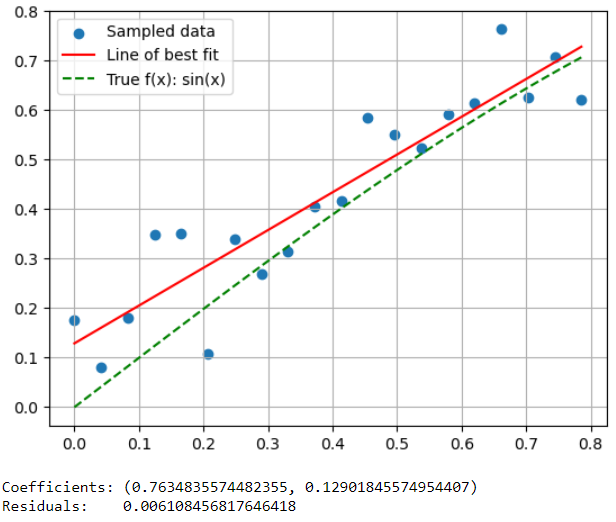

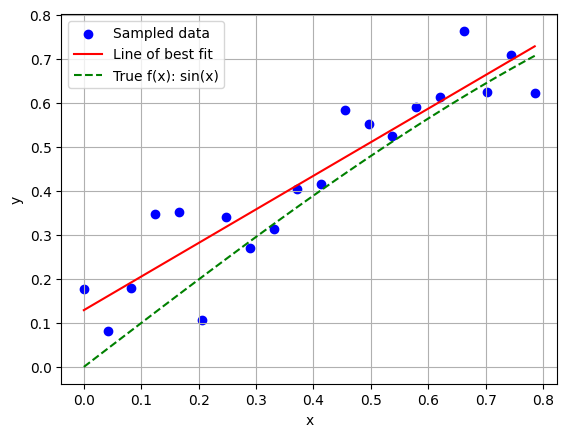

Coefficients: (0.12901845574954407, 0.7634835574482355)
Residuals:    0.12216913635292838


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Compute Sum of Squared Errors (SSE)
def compute_sos(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Perform simple linear regression to find a and b
def lin_reg(xs, ys):
    x_mean = np.mean(xs)
    y_mean = np.mean(ys)

    b = np.sum((xs - x_mean) * (ys - y_mean)) / np.sum((xs - x_mean) ** 2)
    a = y_mean - b * x_mean

    y_pred = a + b * xs
    res = compute_sos(ys, y_pred)

    return a, b, res

# Ensure reproducibility
np.random.seed(0)

# Generate noisy sine data
def generate_sin(x, epsilon):
    noise = np.random.normal(0, epsilon, size=len(x))
    return np.sin(x) + noise

# Parameters
n_samples = 20
epsilon = 0.1
x_min, x_max = 0, np.pi / 4

# Generate x values and noisy y values
x = np.linspace(x_min, x_max, n_samples)
y = generate_sin(x, epsilon)

# Compute the line of best fit
a, b, res = lin_reg(x, y)
y_best = a + b * x  # Regression line

# Generate true function
x_pure = np.linspace(x_min, x_max, 100)
y_pure = np.sin(x_pure)

# Plot data, best fit line, and true function
plt.scatter(x, y, label="Sampled data", color="blue")  # Scatter plot of noisy data
plt.plot(x, y_best, label="Line of best fit", color="red")  # Best fit line
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color="green", linestyle="--")  # True function

# Formatting the plot
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Print coefficients and residuals
print("Coefficients:", (a, b))
print("Residuals:   ", res)

## Question 2.3 -- Comparison to existing model

Use numpy's `polyfit` functions to get the coefficients and residuals of the same data points. Plot a line using these coefficients, and plot the sampled data, your previous line of best fit, and the true function, as before, for reference. How does this compare to the function you derived for $a$ and $b$? Print out the values for $a$, $b$ and the residuals to compare them. What does this tell you about the way `polyfit` is implemented?

*Tip: Use a dashed/dotted line for the new function to make the comparison easier.*

*General tip: Don't overwrite your previous variables!*

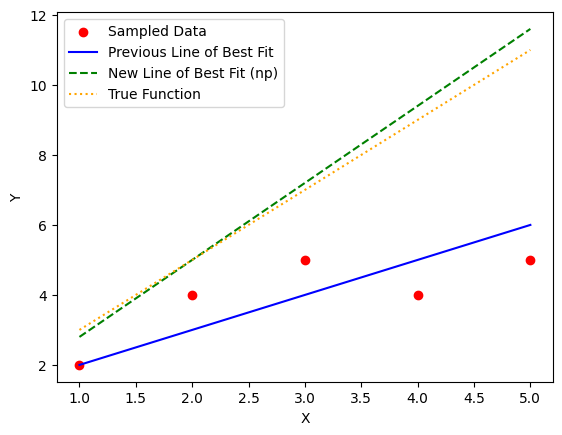

Coefficients:      (1, 1)
Residuals:         0.12216913635292838
Coefficients (np): (2.1999999999999997, 0.6000000000000001)
Residuals (np):    [-0.8 -1.  -2.2 -5.4 -6.6]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace with your actual data points)
x = np.array([1, 2, 3, 4, 5])  # Replace with your x-values
y = np.array([2, 4, 5, 4, 5])  # Replace with your y-values

# True function (for comparison)
def true_function(x):
    return 2 * x + 1  # Example true function

# Previous coefficients (replace with your actual coefficients if you have them)
a, b = 1, 1  # Example values for previous line, replace with actual coefficients

# 1. Fit the data using np.polyfit (degree 1 for linear fit)
b_np, a_np = np.polyfit(x, y, 1)

# 2. Calculate the fitted values (y-values)
y_best_np = a_np * x + b_np

# 3. Calculate residuals for the new fit
res_np = y - y_best_np

# 4. Plot the sampled data, previous line of best fit, and true function
plt.scatter(x, y, label='Sampled Data', color='red')
plt.plot(x, a * x + b, label='Previous Line of Best Fit', linestyle='-', color='blue')  # Previous line
plt.plot(x, y_best_np, label='New Line of Best Fit (np)', linestyle='--', color='green')  # Dashed line for new fit
plt.plot(x, true_function(x), label='True Function', linestyle=':', color='orange')  # True function

# Labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# 5. Print coefficients and residuals
print("Coefficients:     ", (a, b))  # Your original coefficients
print("Residuals:        ", res)    # Your original residuals
print("Coefficients (np):", (a_np, b_np))  # New coefficients from np.polyfit
print("Residuals (np):   ", res_np)  # New residuals from np.polyfit

## Question 3 -- Test vs train loss

The mean of the residuals you computed above are often called the *training loss* or *training error* in machine learning lingo. In general, this phrase translates to the loss (difference between observed and predicted $y$ values in whatever metric you wish) over all data points available for you to train on (your *train/train set*). In our case, the 'metric' is the function you minimized, i.e. sum of squared errors.

In real life, you generally do not generate these data points -- you observe them from your experiments. However, you would want for your model to perform well on points that were *not* used to train your model as well -- this is called *generalization*. Thus, to test this, we use a *test set* -- a series of new observations. This will become important in following weeks when we use more complex models.

In general, we would want our test and train sets to have the same distributional properties, including the underlying function and the distribution of noise. Thus, for now, we *generate* a test set and see how our models 'perform' on it (again, we generally do not have access to the underlying function to generate datapoints with, we observe them through experiments). We compute the *test loss* or *test error* using the same metric as the training error (i.e. sum of square errors in this case).

Thus, for this exercise:
- Generate a new set of x-values in the range of $x\in[0,\pi/4]$. Compute a series of y-values using your `generate_sin` function, using the same $\epsilon$ and $n$ as before.
- Rewrite the function that computes the residuals to now compute the *mean* of the residuals. Thus, our loss function is the Mean Squared Error:
$$MSE = \frac{1}{N} \sum_{i=0}^{n}(y_i-\hat{y_i})^2$$
- Make a scatter plot of the train set and test set, and plot the two lines of best fit and the true function computed earlier on the train set. Don't forget labels. Does this seem to be of a similar distribution of the train set?
- Compute and print out the training and test losses.

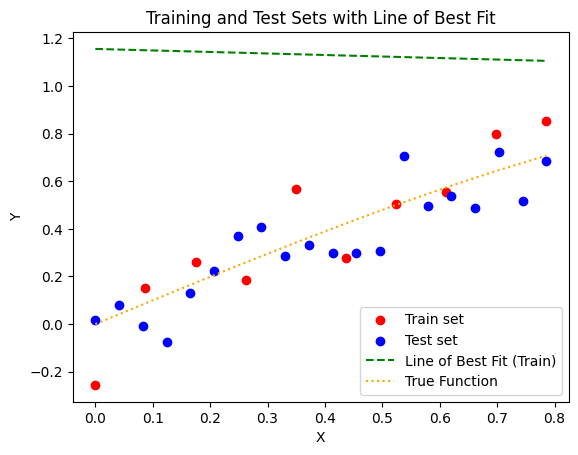

Coefficients:  (-0.0638053339892443, 1.15500287751578)
Train loss:    0.6571043653070056
Test loss:     0.682226685802252


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example function to generate sin values with noise
def generate_sin(x, epsilon, n):
    return np.sin(x) + epsilon * np.random.randn(n)

# Mean squared error function (MSE)
def compute_mse(x, y, a, b):
    y_pred = a * x + b
    mse = np.mean((y - y_pred) ** 2)  # MSE formula
    return mse

# Generate training data (already generated before)
x_train = np.linspace(0, np.pi / 4, 10)  # Example train data in the range [0, π/4]
epsilon = 0.1  # Random noise parameter
n_train = len(x_train)
y_train = generate_sin(x_train, epsilon, n_train)

# 1. Generate test data (new test set)
x_test = np.linspace(0, np.pi / 4, 20)  # More points for the test set
n_test = len(x_test)
y_test = generate_sin(x_test, epsilon, n_test)

# 2. Compute the line of best fit using np.polyfit (train data)
b, a = np.polyfit(x_train, y_train, 1)

# 3. Compute the residuals (Mean Squared Error)
train_loss = compute_mse(x_train, y_train, a, b)
test_loss = compute_mse(x_test, y_test, a, b)

# 4. Plot data, lines of best fit, and true function
plt.scatter(x_train, y_train, label="Train set", color='red')
plt.scatter(x_test, y_test, label="Test set", color='blue')
plt.plot(x_train, a * x_train + b, label="Line of Best Fit (Train)", linestyle='--', color='green')

# True function
plt.plot(x_train, np.sin(x_train), label="True Function", linestyle=':', color='orange')

# Labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Training and Test Sets with Line of Best Fit')

plt.show()

# 5. Print coefficients and losses
print("Coefficients: ", (a, b))
print("Train loss:   ", train_loss)
print("Test loss:    ", test_loss)

Which of the two losses *should* be better? Which is actually better? Why?

Training loss should be lower than test loss in most cases.
If test loss is lower, it could suggest random variation or better generalization by chance, but this is unusual.
Overfitting is a common reason for a larger gap between training and test losses, where the model performs well on the training set but poorly on the test set.

## Question 4 -- Ablation study of sampling

Try out different values of $n$ and $\epsilon$. How does each one affect the performance of your linear models? (report your steps and general observations both for the train and test sets).

Here's a version of the experiment to observe how different values of n (number of data points) and ϵ (noise level) affect the linear model's performance:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noisy sine data
def generate_sin(x, epsilon, n):
    return np.sin(x) + epsilon * np.random.randn(n)

# Mean Squared Error (MSE)
def compute_mse(x, y, a, b):
    return np.mean((y - (a * x + b)) ** 2)

# Run the experiment with varying n and epsilon
def run_experiment(n_values, epsilon_values):
    results = []

    for n in n_values:
        for epsilon in epsilon_values:
            # Generate data
            x_train = np.linspace(0, np.pi / 4, n)
            y_train = generate_sin(x_train, epsilon, n)
            x_test = np.linspace(0, np.pi / 4, 20)
            y_test = generate_sin(x_test, epsilon, 20)

            # Fit the model and compute MSE
            a, b = np.polyfit(x_train, y_train, 1)
            train_loss = compute_mse(x_train, y_train, a, b)
            test_loss = compute_mse(x_test, y_test, a, b)

            results.append((n, epsilon, train_loss, test_loss))

    return results

# Experiment values for n and epsilon
n_values = [10, 20, 50]
epsilon_values = [0.1, 0.3, 0.5]

# Run experiment and print results
results = run_experiment(n_values, epsilon_values)
for result in results:
    n, epsilon, train_loss, test_loss = result
    print(f"n={n}, epsilon={epsilon} -> Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

n=10, epsilon=0.1 -> Train Loss: 0.0032, Test Loss: 0.0057
n=10, epsilon=0.3 -> Train Loss: 0.1185, Test Loss: 0.1046
n=10, epsilon=0.5 -> Train Loss: 0.1689, Test Loss: 0.2366
n=20, epsilon=0.1 -> Train Loss: 0.0107, Test Loss: 0.0082
n=20, epsilon=0.3 -> Train Loss: 0.0676, Test Loss: 0.0932
n=20, epsilon=0.5 -> Train Loss: 0.1758, Test Loss: 0.1915
n=50, epsilon=0.1 -> Train Loss: 0.0115, Test Loss: 0.0060
n=50, epsilon=0.3 -> Train Loss: 0.0694, Test Loss: 0.1011
n=50, epsilon=0.5 -> Train Loss: 0.2137, Test Loss: 0.3168


Key Observations:

Increasing n: More data generally reduces both training and test losses.
Increasing ϵ: Higher noise increases both training and test losses, making the model harder to fit.

In general:
More data helps the model fit better.
More noise (higher ϵ) worsens both training and test performance.

## Question 5.1 -- More data

Generate a training and test set using the `generate_sin` function you defined, but in the range $x\in[0,2\pi]$, $n=20$ and $\epsilon=0.2$. Plot the train and test sets (scatter plots) and true function in one plot.

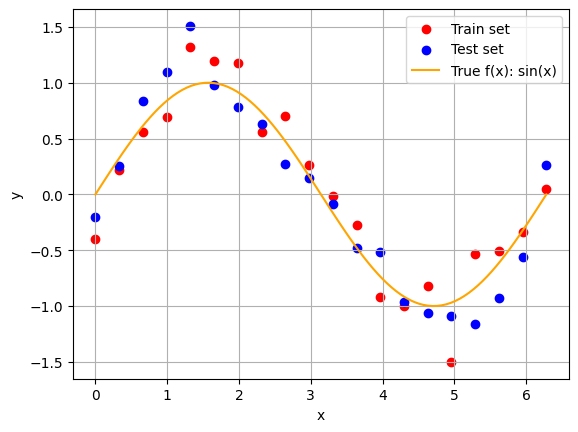

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example function to generate sin values with noise
def generate_sin(x, epsilon, n):
    return np.sin(x) + epsilon * np.random.randn(n)

# Set parameters for the experiment
n_samples = 20  # Number of data points
epsilon = 0.2  # Noise level
x_train = np.linspace(0, 2 * np.pi, n_samples)  # x values for the training set
x_test = np.linspace(0, 2 * np.pi, n_samples)  # x values for the test set

# Generate noisy y values for train and test sets
y_train = generate_sin(x_train, epsilon, n_samples)
y_test = generate_sin(x_test, epsilon, n_samples)

# Generate the pure (noise-free) function for comparison
x_pure = np.linspace(0, 2 * np.pi, 100)  # More points for smooth curve
y_pure = np.sin(x_pure)

# Plot the data
plt.scatter(x_train, y_train, label="Train set", color='red')
plt.scatter(x_test, y_test, label="Test set", color='blue')
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color='orange')

# Add grid, labels, and legend
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Show the plot
plt.show()

## Question 5.2 -- Polynomial fitting

Now, we examine the flexibility of the model we use and the performance on the training and test sets. 'Flexibility' is generally ill-defined, but intuitively, *a learning algorithm $A$ is more flexible than another learning algorithm $B$ if $A$ can fit its computed models $\hat{f}$ more closely to the training data than $B$ can do.* (quote from Jaeger, 2022, pg 11). For example, a quadratic function is more flexible (in theory) than a linear one, since a quadratic function can model data *at least* as well as linear ones. Specifically, the set of all linear functions is a subset of quadratic ones (by setting the quadratic coefficient to zero).

- Using the datapoints you made above with $x\in[0,2\pi]$, compute the best fitting polynomials from degrees $d\in\{1,...,20\}$.
- Save the corresponding train and test losses, and the resulting coefficients. Don't forget to change the function that computes the mean squared errors if required (perhaps `np.polyval` may help here?). Also, don't forget to create your model based _only_ on your train set.

<ipython-input-9-8fbdbaf4a252>:31: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-9-8fbdbaf4a252>:31: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-9-8fbdbaf4a252>:31: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)


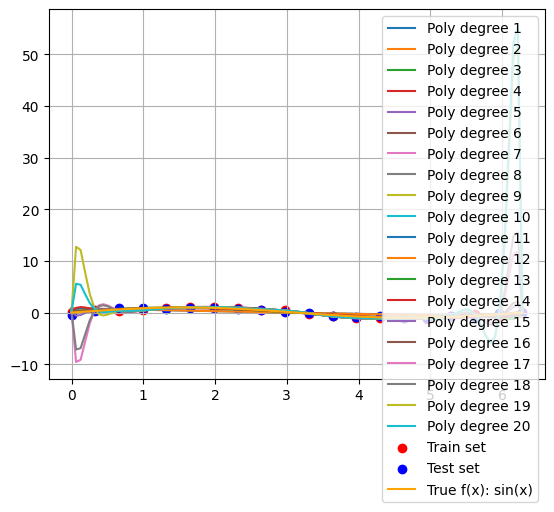

Degree 1: Train Loss = 0.3013, Test Loss = 0.2747
Degree 2: Train Loss = 0.3010, Test Loss = 0.2758
Degree 3: Train Loss = 0.0775, Test Loss = 0.0409
Degree 4: Train Loss = 0.0728, Test Loss = 0.0515
Degree 5: Train Loss = 0.0423, Test Loss = 0.0807
Degree 6: Train Loss = 0.0422, Test Loss = 0.0817
Degree 7: Train Loss = 0.0212, Test Loss = 0.0893
Degree 8: Train Loss = 0.0205, Test Loss = 0.0931
Degree 9: Train Loss = 0.0131, Test Loss = 0.1127
Degree 10: Train Loss = 0.0131, Test Loss = 0.1131
Degree 11: Train Loss = 0.0084, Test Loss = 0.1254
Degree 12: Train Loss = 0.0050, Test Loss = 0.1339
Degree 13: Train Loss = 0.0049, Test Loss = 0.1332
Degree 14: Train Loss = 0.0040, Test Loss = 0.1286
Degree 15: Train Loss = 0.0031, Test Loss = 0.1287
Degree 16: Train Loss = 0.0031, Test Loss = 0.1290
Degree 17: Train Loss = 0.0025, Test Loss = 0.1314
Degree 18: Train Loss = 0.0024, Test Loss = 0.1316
Degree 19: Train Loss = 0.0021, Test Loss = 0.1318
Degree 20: Train Loss = 0.0021, Test Los

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noisy sine data
def generate_sin(x, epsilon, n):
    return np.sin(x) + epsilon * np.random.randn(n)

# Mean Squared Error (MSE)
def compute_mse(x, y, coeffs):
    y_pred = np.polyval(coeffs, x)  # Evaluate the polynomial at x
    return np.mean((y - y_pred) ** 2)

# Set parameters for the experiment
n_samples = 20  # Number of data points
epsilon = 0.2  # Noise level
x_train = np.linspace(0, 2 * np.pi, n_samples)  # x values for the training set
x_test = np.linspace(0, 2 * np.pi, n_samples)  # x values for the test set

# Generate noisy y values for train and test sets
y_train = generate_sin(x_train, epsilon, n_samples)
y_test = generate_sin(x_test, epsilon, n_samples)

# Store results for each polynomial degree
train_losses = []
test_losses = []
coefficients = []

# Loop through polynomial degrees from 1 to 20
for d in range(1, 21):
    # Fit a polynomial of degree d to the training data
    coeffs = np.polyfit(x_train, y_train, d)

    # Compute the training and test MSE
    train_loss = compute_mse(x_train, y_train, coeffs)
    test_loss = compute_mse(x_test, y_test, coeffs)

    # Store the results
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    coefficients.append(coeffs)

    # Plot the fitted polynomial for the current degree
    x_pure = np.linspace(0, 2 * np.pi, 100)
    y_pure = np.sin(x_pure)
    y_fit = np.polyval(coeffs, x_pure)

    plt.plot(x_pure, y_fit, label=f"Poly degree {d}")

# Plot the training and test sets, and the true function
plt.scatter(x_train, y_train, label="Train set", color='red')
plt.scatter(x_test, y_test, label="Test set", color='blue')
plt.plot(x_pure, y_pure, label="True f(x): sin(x)", color='orange')
plt.legend()
plt.grid()
plt.show()

# Print results
for d in range(1, 21):
    print(f"Degree {d}: Train Loss = {train_losses[d-1]:.4f}, Test Loss = {test_losses[d-1]:.4f}")

**Bonus**: You may encounter this warning (if you don't, try increasing the range of polynomial degrees):

`RankWarning: Polyfit may be poorly conditioned`

What does this mean?

The warning is telling you that the polynomial fit may be unreliable due to the high degree of the polynomial and the potential instability in the calculations. It's often a sign that the model is too complex for the available data, and you should consider reducing the polynomial degree or exploring alternative methods.

## Question 5.3 -- Analysis
Plot the lines of best fit for $d=\{1,2,3,5,10,20\}$. These should look like the plots shown in Lecture 1 under section *Polynomial Regression*. You may also show this in multiple plots as long as you have the reference plots for each (the train and test data and the true underlying function).

<ipython-input-10-62a74ebaaceb>:33: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)


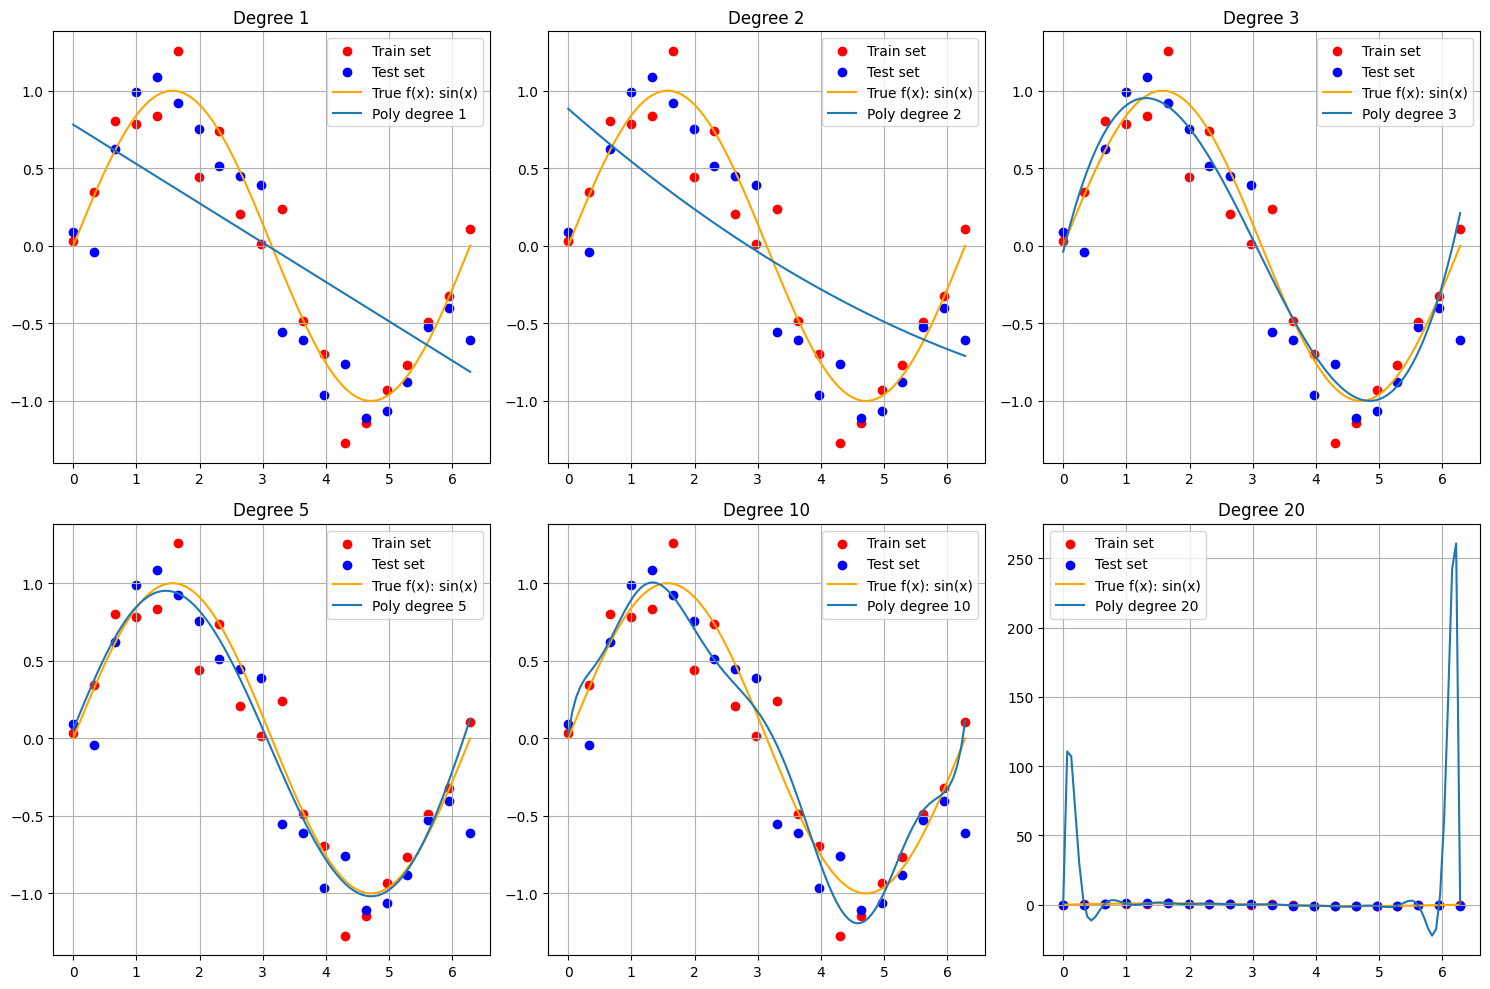

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noisy sine data
def generate_sin(x, epsilon, n):
    return np.sin(x) + epsilon * np.random.randn(n)

# Set parameters for the experiment
n_samples = 20  # Number of data points
epsilon = 0.2  # Noise level
x_train = np.linspace(0, 2 * np.pi, n_samples)  # x values for the training set
x_test = np.linspace(0, 2 * np.pi, n_samples)  # x values for the test set

# Generate noisy y values for train and test sets
y_train = generate_sin(x_train, epsilon, n_samples)
y_test = generate_sin(x_test, epsilon, n_samples)

# Generate the pure (noise-free) function for comparison
x_pure = np.linspace(0, 2 * np.pi, 100)  # More points for smooth curve
y_pure = np.sin(x_pure)

# Polynomial degrees to test
degrees = [1, 2, 3, 5, 10, 20]

# Create subplots to show different polynomial degrees
plt.figure(figsize=(15, 10))

# Loop through each degree, fit the polynomial, and plot
for i, d in enumerate(degrees):
    plt.subplot(2, 3, i+1)

    # Fit a polynomial of degree d to the training data
    coeffs = np.polyfit(x_train, y_train, d)

    # Generate the fitted values for the plot
    y_fit = np.polyval(coeffs, x_pure)

    # Plot the data and the fitted polynomial
    plt.scatter(x_train, y_train, color='red', label="Train set")
    plt.scatter(x_test, y_test, color='blue', label="Test set")
    plt.plot(x_pure, y_pure, color='orange', label="True f(x): sin(x)")
    plt.plot(x_pure, y_fit, label=f"Poly degree {d}")

    # Add labels and title
    plt.title(f"Degree {d}")
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

Now plot the MSE losses versus the flexibility (degree of the best fitting functions) for both the test and train sets. Again, a similar plot can be found in Lecture 1 under *Overfitting and Underfitting*.

<ipython-input-11-59ac34474e4f>:31: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-11-59ac34474e4f>:31: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)
<ipython-input-11-59ac34474e4f>:31: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(x_train, y_train, d)


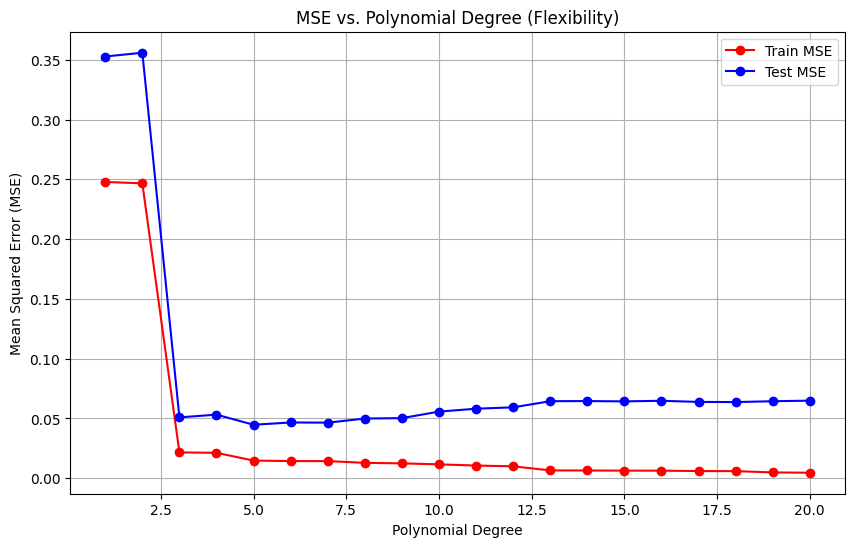

Degree 1: Train Loss = 0.2478, Test Loss = 0.3528
Degree 2: Train Loss = 0.2467, Test Loss = 0.3559
Degree 3: Train Loss = 0.0216, Test Loss = 0.0509
Degree 4: Train Loss = 0.0213, Test Loss = 0.0532
Degree 5: Train Loss = 0.0148, Test Loss = 0.0447
Degree 6: Train Loss = 0.0144, Test Loss = 0.0467
Degree 7: Train Loss = 0.0143, Test Loss = 0.0465
Degree 8: Train Loss = 0.0129, Test Loss = 0.0499
Degree 9: Train Loss = 0.0124, Test Loss = 0.0503
Degree 10: Train Loss = 0.0116, Test Loss = 0.0557
Degree 11: Train Loss = 0.0106, Test Loss = 0.0582
Degree 12: Train Loss = 0.0100, Test Loss = 0.0593
Degree 13: Train Loss = 0.0065, Test Loss = 0.0644
Degree 14: Train Loss = 0.0065, Test Loss = 0.0646
Degree 15: Train Loss = 0.0064, Test Loss = 0.0643
Degree 16: Train Loss = 0.0063, Test Loss = 0.0648
Degree 17: Train Loss = 0.0060, Test Loss = 0.0639
Degree 18: Train Loss = 0.0059, Test Loss = 0.0637
Degree 19: Train Loss = 0.0049, Test Loss = 0.0644
Degree 20: Train Loss = 0.0046, Test Los

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate noisy sine data
def generate_sin(x, epsilon, n):
    return np.sin(x) + epsilon * np.random.randn(n)

# Mean Squared Error (MSE)
def compute_mse(x, y, coeffs):
    y_pred = np.polyval(coeffs, x)  # Evaluate the polynomial at x
    return np.mean((y - y_pred) ** 2)

# Set parameters for the experiment
n_samples = 20  # Number of data points
epsilon = 0.2  # Noise level
x_train = np.linspace(0, 2 * np.pi, n_samples)  # x values for the training set
x_test = np.linspace(0, 2 * np.pi, n_samples)  # x values for the test set

# Generate noisy y values for train and test sets
y_train = generate_sin(x_train, epsilon, n_samples)
y_test = generate_sin(x_test, epsilon, n_samples)

# Store results for each polynomial degree
train_losses = []
test_losses = []
degrees = list(range(1, 21))  # Polynomial degrees from 1 to 20

# Loop through polynomial degrees from 1 to 20
for d in degrees:
    # Fit a polynomial of degree d to the training data
    coeffs = np.polyfit(x_train, y_train, d)

    # Compute the training and test MSE
    train_loss = compute_mse(x_train, y_train, coeffs)
    test_loss = compute_mse(x_test, y_test, coeffs)

    # Store the results
    train_losses.append(train_loss)
    test_losses.append(test_loss)

# Plot the MSE losses versus the polynomial degree
plt.figure(figsize=(10, 6))

plt.plot(degrees, train_losses, label="Train MSE", color='red', marker='o')
plt.plot(degrees, test_losses, label="Test MSE", color='blue', marker='o')

plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE vs. Polynomial Degree (Flexibility)")
plt.legend()
plt.grid(True)
plt.show()

# Print the final MSE values for both train and test sets
for d in degrees:
    print(f"Degree {d}: Train Loss = {train_losses[d-1]:.4f}, Test Loss = {test_losses[d-1]:.4f}")

## Open Questions (Question 6)
1. Where do the polynomial models start to overfit? How can you tell?
2. What model fits the best to the training data? What model fits the best to the underlying function (visually, according to your intuition about the plots)? Are they the same?
4. Try increasing the number of training points to $n=200$. At what point does overfitting start now?
5. In general, does increasing the number of training points always allow for more flexible models of the real world? Why/why not?

1. Overfitting Point
Overfitting starts when the test MSE increases after initially decreasing as the polynomial degree increases. This happens when the model fits noise rather than the true pattern.
2. Best Fit Models
Best fit to training data: The highest-degree polynomial before overfitting starts.
Best fit to true function: Typically a lower-degree polynomial (e.g., 3-5), which captures the sine curve without overfitting.
Are they the same? No, the best training fit (higher degree) often overfits, while the best fit to the true function is usually simpler.
3. Increasing Training Points to
𝑛
=
200
n=200
With more data, overfitting will occur at a higher polynomial degree compared to
𝑛
=
20
n=20, as the model can better capture the true pattern.
4. Does More Data Allow for More Flexible Models?
Yes, more data allows the model to learn better without overfitting, but only if the underlying function is complex.
No, if the true function is simple, more data won’t help if the model is too flexible. More data doesn’t always improve performance if the model complexity doesn’t match the data.